In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising=pd.read_csv("Company_data.csv")

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.info()

advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


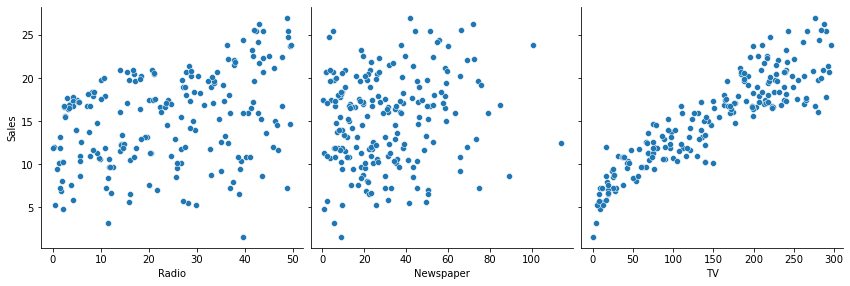

In [4]:
sns.pairplot(advertising, x_vars=['Radio','Newspaper','TV'], y_vars='Sales', height=4, kind ='scatter')

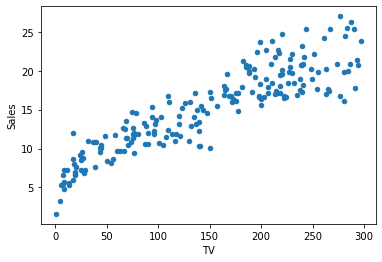

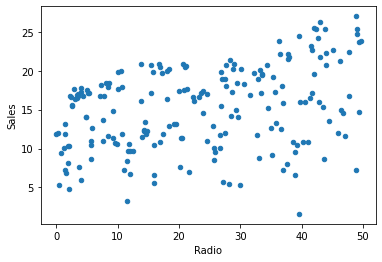

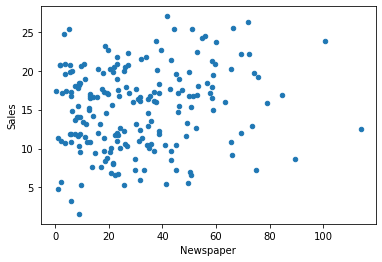

In [5]:

advertising.plot(kind='scatter', x='TV', y='Sales')
advertising.plot(kind='scatter', x='Radio', y='Sales')
advertising.plot(kind='scatter', x='Newspaper', y='Sales')

plt.show()

In [6]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## TV and sales are highly correlated
x: TV y:Sales
## Newspaper and sales are poorly correlated; 

In [7]:
X=advertising['TV']#input feature


In [8]:
y=advertising['Sales']#output/ dependent feature

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test=train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

In [10]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [11]:
X_train.shape
# data is as a Series

(140,)

In [12]:
X_train=X_train.values.reshape(-1,1)
# converting the training values  to a column, making it as a 2D matrix

In [13]:
X_test=X_test.values.reshape(-1,1)

In [14]:
X_train.shape

(140, 1)

In [15]:
from sklearn.linear_model import LinearRegression
#training the model
#creating the bject of Linear Regression
lr=LinearRegression()
#fit model using .fit()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
print ("Intercept: ", lr.intercept_)

print("Slope: ", lr.coef_)

Intercept:  6.9486832000013585
Slope:  [0.05454575]


In [17]:
#finding the cod. values between 0 and 1
from sklearn.metrics import r2_score
# Making the prediction on y values

y_train_pred= lr.predict(X_train)

y_test_pred= lr.predict(X_test)

In [18]:
print(r2_score(y_train, y_train_pred))
# on training dataset

0.8157933136480388


In [19]:
print(r2_score(y_test, y_test_pred))
# on testing dataset

0.792103160124566


In [20]:
from sklearn.metrics import mean_absolute_error as mae

In [21]:
print("MAE: " ,mae(y_test, y_test_pred))

MAE:  1.6480589869746527


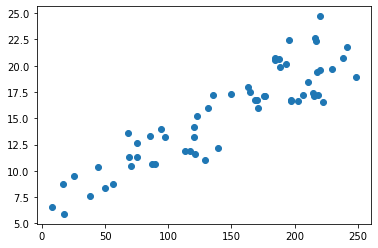

In [22]:
#visualization
plt.scatter(X_test, y_test)

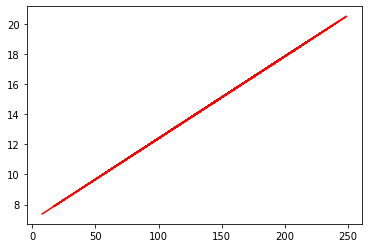

In [23]:
plt.plot( X_test, y_test_pred, 'r')

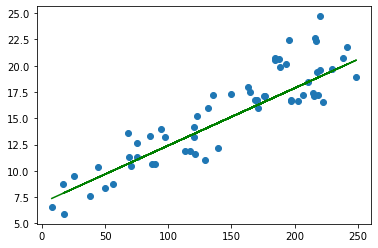

In [24]:
plt.scatter(X_test, y_test)
plt.plot( X_test, y_test_pred, 'g')
plt.show()